In [1]:
import pandas as pd


In [2]:
path ="D:/Python/ACW/600092_data.csv" 

In [3]:
df = pd.read_csv(path, encoding = 'utf-8')

In [4]:
df

,Random,Id,Indication,Diabetes,IHD,Hypertension,Arrhythmia,History,IPSI,Contra,label
0,0.602437,218242,A-F,no,no,yes,no,no,78.0,20,NoRisk
1,0.602437,159284,TIA,no,no,no,no,no,70.0,60,NoRisk
2,0.602437,106066,A-F,no,yes,yes,no,no,95.0,40,Risk
3,0.128157,229592,TIA,no,no,yes,no,no,90.0,85,Risk
4,0.676862,245829,CVA,no,no,no,no,no,70.0,20,NoRisk
...,...,...,...,...,...,...,...,...,...,...,...
1515,0.391440,93406,A-F,no,yes,no,no,no,76.0,60,NoRisk
1516,0.253504,121814,A-F,no,no,yes,yes,no,90.0,75,Risk
1517,0.620373,101754,TIA,no,no,yes,no,no,75.0,20,NoRisk
1518,0.639342,263836,A-F,no,yes,no,no,no,70.0,45,NoRisk


# Testing for null values using var

In [5]:
var = df['label']
var.isnull().sum()

3

# Data visualization trial (BM)

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt

In [7]:
%matplotlib inline

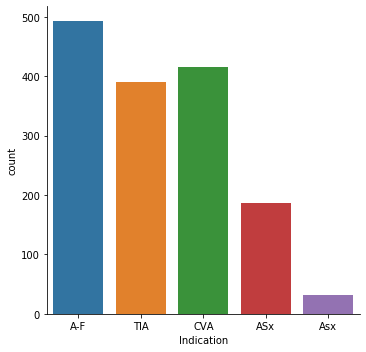

In [8]:
sns.catplot('Indication', data = df, kind='count' )

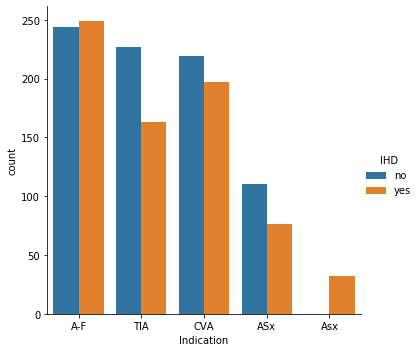

In [9]:
sns.catplot('Indication', data = df, kind='count', hue = 'IHD')

# DATA NEEDS CLEANING AT ASX

In [10]:
df['Indication'] = df['Indication'].replace(['Asx'], 'ASx')

In [11]:
for index, row in df.iterrows(): 
     if ((row["Indication"])== "Asx"):
       print(row["Indication"])

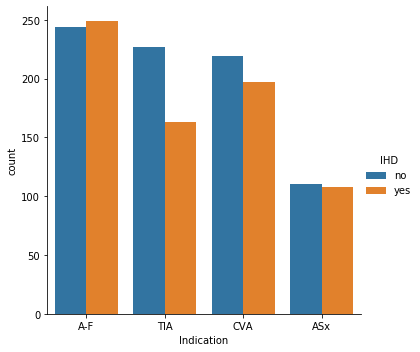

In [12]:
sns.catplot('Indication', data = df, kind='count', hue = 'IHD')

# DID MY FIRSTCLEANING XD

In [13]:
df['Indication'].isnull().sum()

3

In [14]:
df.describe()

,Random,Id,IPSI
count,1520.000000,1520.000000,1516.000000
mean,0.509545,188365.022368,78.872032
std,0.284006,64355.870242,10.162351
min,0.000295,78261.000000,35.000000
25%,0.268531,137130.750000,73.000000
50%,0.517616,191344.500000,77.000000
75%,0.754724,244559.500000,85.000000
max,0.999448,295978.000000,99.000000


In [15]:
df1 = df[df.isna().any(axis=1)]
print (df1)

        Random      Id Indication Diabetes  IHD Hypertension Arrhythmia  \
201   0.388790  240232        CVA      yes   no          NaN        yes   
337   0.617072  260770        CVA       no  yes           no         no   
442   0.648122  261060        NaN       no  yes          yes         no   
447   0.681744  224257        CVA      NaN  yes          yes        yes   
514   0.392130  210861        A-F      NaN   no          yes         no   
590   0.707950  289096        A-F       no   no          NaN         no   
620   0.283872  227779        A-F       no   no           no         no   
752   0.243518  146415        CVA       no  yes          yes        yes   
784   0.243645  196483        CVA       no   no          yes        yes   
812   0.756938  190671        CVA       no  yes          yes         no   
822   0.211760  205845        NaN       no  yes           no         no   
845   0.920096  104176        CVA       no   no           no         no   
916   0.004501  281679   

##Filling nan in ipsi


In [16]:
##check for duplicate vals
for x in  df.duplicated(subset='Random', keep=False):
    if x == 'True':
        print(x)

In [17]:
f =  df.duplicated(subset='Random', keep=False)
type(f)

pandas.core.series.Series

In [18]:
print(f)

0        True
1        True
2        True
3       False
4       False
        ...  
1515     True
1516    False
1517    False
1518    False
1519    False
Length: 1520, dtype: bool


In [19]:
count = -1
count3 = 0
List = []
t = True
for x in f:
    count= count + 1
    if(x==t):
        ##print(x, count)
        List.append(count)
        count3 = count3 + 1

In [20]:
List2 = []
for index, row in df.iterrows():
    if index in List:
        List2.append(row)

In [21]:
List2

[Random          0.602437
 Id                218242
 Indication           A-F
 Diabetes              no
 IHD                   no
 Hypertension         yes
 Arrhythmia            no
 History               no
 IPSI                  78
 Contra               20 
 label             NoRisk
 Name: 0, dtype: object, Random          0.602437
 Id                159284
 Indication           TIA
 Diabetes              no
 IHD                   no
 Hypertension          no
 Arrhythmia            no
 History               no
 IPSI                  70
 Contra               60 
 label             NoRisk
 Name: 1, dtype: object, Random          0.602437
 Id                106066
 Indication           A-F
 Diabetes              no
 IHD                  yes
 Hypertension         yes
 Arrhythmia            no
 History               no
 IPSI                  95
 Contra                40
 label               Risk
 Name: 2, dtype: object, Random          0.678157
 Id                256128
 Indication       

In [22]:
List

[0,
 1,
 2,
 8,
 10,
 13,
 15,
 16,
 19,
 20,
 22,
 24,
 25,
 26,
 28,
 30,
 32,
 34,
 36,
 38,
 44,
 46,
 48,
 50,
 52,
 54,
 56,
 57,
 58,
 59,
 60,
 61,
 62,
 64,
 66,
 68,
 70,
 72,
 74,
 76,
 78,
 84,
 86,
 88,
 90,
 92,
 101,
 104,
 106,
 108,
 110,
 112,
 114,
 132,
 134,
 136,
 138,
 140,
 142,
 144,
 146,
 148,
 150,
 152,
 153,
 154,
 155,
 156,
 158,
 160,
 162,
 164,
 166,
 168,
 170,
 176,
 178,
 180,
 182,
 184,
 188,
 189,
 190,
 192,
 194,
 196,
 198,
 199,
 212,
 214,
 216,
 217,
 219,
 220,
 222,
 224,
 225,
 226,
 228,
 230,
 231,
 232,
 233,
 237,
 244,
 245,
 247,
 248,
 249,
 254,
 255,
 256,
 258,
 260,
 261,
 262,
 264,
 265,
 266,
 268,
 269,
 270,
 272,
 274,
 276,
 278,
 280,
 282,
 284,
 286,
 300,
 302,
 304,
 308,
 310,
 312,
 314,
 316,
 318,
 320,
 322,
 325,
 328,
 330,
 332,
 334,
 336,
 338,
 340,
 344,
 346,
 350,
 356,
 358,
 360,
 362,
 364,
 366,
 368,
 369,
 370,
 372,
 373,
 374,
 375,
 376,
 377,
 378,
 379,
 380,
 382,
 383,
 386,
 387,
 388,


In [23]:
import random
List3 = []
for item in List2:
    randomNumber = random.uniform(0, 1)
    if randomNumber != df['Random'].count():
        List3.append(randomNumber)
        item['Random'] = randomNumber
        print(item)

Random          0.989777
Id                218242
Indication           A-F
Diabetes              no
IHD                   no
Hypertension         yes
Arrhythmia            no
History               no
IPSI                  78
Contra               20 
label             NoRisk
Name: 0, dtype: object
Random          0.0357662
Id                 159284
Indication            TIA
Diabetes               no
IHD                    no
Hypertension           no
Arrhythmia             no
History                no
IPSI                   70
Contra                60 
label              NoRisk
Name: 1, dtype: object
Random          0.52896
Id               106066
Indication          A-F
Diabetes             no
IHD                 yes
Hypertension        yes
Arrhythmia           no
History              no
IPSI                 95
Contra               40
label              Risk
Name: 2, dtype: object
Random          0.382257
Id                256128
Indication           TIA
Diabetes              no
IHD   

Name: 593, dtype: object
Random          0.299832
Id                263205
Indication           TIA
Diabetes              no
IHD                  yes
Hypertension          no
Arrhythmia            no
History               no
IPSI                  78
Contra               30 
label             NoRisk
Name: 594, dtype: object
Random          0.540279
Id                217244
Indication           A-F
Diabetes              no
IHD                  yes
Hypertension          no
Arrhythmia            no
History               no
IPSI                  76
Contra               50 
label             NoRisk
Name: 596, dtype: object
Random          0.988598
Id                292024
Indication           ASx
Diabetes              no
IHD                   no
Hypertension          no
Arrhythmia           yes
History               no
IPSI                  90
Contra               100
label               Risk
Name: 597, dtype: object
Random          0.543066
Id                 78484
Indication           CVA


Name: 1246, dtype: object
Random          0.130538
Id                271514
Indication           CVA
Diabetes              no
IHD                  yes
Hypertension          no
Arrhythmia            no
History               no
IPSI                  90
Contra               20 
label             NoRisk
Name: 1247, dtype: object
Random          0.315689
Id                120590
Indication           TIA
Diabetes             yes
IHD                   no
Hypertension         yes
Arrhythmia            no
History               no
IPSI                  90
Contra               100
label               Risk
Name: 1250, dtype: object
Random          0.324847
Id                189796
Indication           CVA
Diabetes              no
IHD                  yes
Hypertension         yes
Arrhythmia            no
History               no
IPSI                  85
Contra               50 
label             NoRisk
Name: 1251, dtype: object
Random          0.385239
Id                275834
Indication           

In [24]:
##refer each random number to index
##i wanna loop through each index(list) and random number(list3) at the same time
counter1 = 0
for item in List:
    x = df.loc[item,:]
    x.values[0]=List3[counter1]
    df.loc[item,:] = x
    counter1 = counter1 + 1
    print(x)

Random          0.989777
Id                218242
Indication           A-F
Diabetes              no
IHD                   no
Hypertension         yes
Arrhythmia            no
History               no
IPSI                  78
Contra               20 
label             NoRisk
Name: 0, dtype: object
Random          0.0357662
Id                 159284
Indication            TIA
Diabetes               no
IHD                    no
Hypertension           no
Arrhythmia             no
History                no
IPSI                   70
Contra                60 
label              NoRisk
Name: 1, dtype: object
Random          0.52896
Id               106066
Indication          A-F
Diabetes             no
IHD                 yes
Hypertension        yes
Arrhythmia           no
History              no
IPSI                 95
Contra               40
label              Risk
Name: 2, dtype: object
Random          0.382257
Id                256128
Indication           TIA
Diabetes              no
IHD   

Name: 74, dtype: object
Random          0.251179
Id                295941
Indication           TIA
Diabetes              no
IHD                  yes
Hypertension          no
Arrhythmia            no
History               no
IPSI                  73
Contra               30 
label             NoRisk
Name: 76, dtype: object
Random          0.919964
Id                 87786
Indication           A-F
Diabetes              no
IHD                   no
Hypertension          no
Arrhythmia            no
History               no
IPSI                  78
Contra               30 
label             NoRisk
Name: 78, dtype: object
Random          0.231489
Id                243060
Indication           TIA
Diabetes              no
IHD                  yes
Hypertension          no
Arrhythmia            no
History               no
IPSI                  82
Contra               70 
label             NoRisk
Name: 84, dtype: object
Random          0.290905
Id                 83815
Indication           ASx
Diab

Name: 176, dtype: object
Random          0.298431
Id                191092
Indication           A-F
Diabetes              no
IHD                   no
Hypertension          no
Arrhythmia            no
History               no
IPSI                  80
Contra               100
label               Risk
Name: 178, dtype: object
Random          0.142086
Id                261596
Indication           ASx
Diabetes              no
IHD                   no
Hypertension          no
Arrhythmia            no
History               no
IPSI                  78
Contra               35 
label             NoRisk
Name: 180, dtype: object
Random          0.904644
Id                 97917
Indication           CVA
Diabetes              no
IHD                  yes
Hypertension         yes
Arrhythmia           yes
History               no
IPSI                  90
Contra               100
label               Risk
Name: 182, dtype: object
Random          0.796258
Id                234684
Indication           ASx


Random          0.133178
Id                171463
Indication           TIA
Diabetes              no
IHD                  yes
Hypertension         yes
Arrhythmia            no
History               no
IPSI                  75
Contra               50 
label             NoRisk
Name: 260, dtype: object
Random          0.608037
Id                175170
Indication           TIA
Diabetes              no
IHD                   no
Hypertension          no
Arrhythmia            no
History               no
IPSI                  75
Contra               75 
label             NoRisk
Name: 261, dtype: object
Random          0.683725
Id                234112
Indication           A-F
Diabetes              no
IHD                  yes
Hypertension          no
Arrhythmia            no
History              yes
IPSI                  80
Contra                50
label               Risk
Name: 262, dtype: object
Random          0.268064
Id                259122
Indication           TIA
Diabetes              no


Name: 362, dtype: object
Random          0.635151
Id                138794
Indication           ASx
Diabetes              no
IHD                   no
Hypertension          no
Arrhythmia           yes
History               no
IPSI                  90
Contra               100
label               Risk
Name: 364, dtype: object
Random          0.483397
Id                 92719
Indication           CVA
Diabetes              no
IHD                   no
Hypertension         yes
Arrhythmia            no
History               no
IPSI                  75
Contra               20 
label             NoRisk
Name: 366, dtype: object
Random          0.931843
Id                262252
Indication           CVA
Diabetes             yes
IHD                  yes
Hypertension         yes
Arrhythmia            no
History               no
IPSI                  70
Contra               20 
label             NoRisk
Name: 368, dtype: object
Random          0.617866
Id                151423
Indication           CVA


Name: 426, dtype: object
Random          0.227129
Id                166944
Indication           ASx
Diabetes              no
IHD                   no
Hypertension          no
Arrhythmia           yes
History               no
IPSI                  95
Contra                95
label               Risk
Name: 432, dtype: object
Random          0.841831
Id                170750
Indication           CVA
Diabetes              no
IHD                  yes
Hypertension         yes
Arrhythmia            no
History               no
IPSI                  80
Contra               20 
label             NoRisk
Name: 433, dtype: object
Random          0.211685
Id                246842
Indication           TIA
Diabetes              no
IHD                   no
Hypertension         yes
Arrhythmia            no
History               no
IPSI                  73
Contra               40 
label             NoRisk
Name: 436, dtype: object
Random          0.00672602
Id                  287595
Indication           

Name: 498, dtype: object
Random          0.874743
Id                206914
Indication           A-F
Diabetes              no
IHD                   no
Hypertension          no
Arrhythmia            no
History               no
IPSI                  75
Contra               55 
label             NoRisk
Name: 522, dtype: object
Random          0.320217
Id                283846
Indication           CVA
Diabetes              no
IHD                   no
Hypertension         yes
Arrhythmia           yes
History               no
IPSI                  95
Contra               100
label            Unknown
Name: 523, dtype: object
Random          0.000365117
Id                   171066
Indication              CVA
Diabetes                 no
IHD                     yes
Hypertension            yes
Arrhythmia              yes
History                  no
IPSI                     80
Contra                   50
label                  Risk
Name: 532, dtype: object
Random          0.38083
Id               2

Name: 638, dtype: object
Random          0.439152
Id                282658
Indication           A-F
Diabetes              no
IHD                   no
Hypertension         yes
Arrhythmia           yes
History               no
IPSI                  75
Contra               100
label               Risk
Name: 639, dtype: object
Random          0.748902
Id                202357
Indication           TIA
Diabetes              no
IHD                   no
Hypertension          no
Arrhythmia            no
History               no
IPSI                  75
Contra               75 
label             NoRisk
Name: 642, dtype: object
Random          0.701815
Id                 78660
Indication           TIA
Diabetes              no
IHD                  yes
Hypertension          no
Arrhythmia            no
History               no
IPSI                  80
Contra               20 
label             NoRisk
Name: 656, dtype: object
Random          0.541596
Id                209890
Indication           TIA


Name: 736, dtype: object
Random          0.168844
Id                 79760
Indication           CVA
Diabetes              no
IHD                   no
Hypertension          no
Arrhythmia            no
History               no
IPSI                  99
Contra               30 
label             NoRisk
Name: 738, dtype: object
Random          0.847484
Id                171512
Indication           CVA
Diabetes              no
IHD                  yes
Hypertension         yes
Arrhythmia            no
History               no
IPSI                  76
Contra               40 
label             NoRisk
Name: 740, dtype: object
Random          0.0254516
Id                  84366
Indication            A-F
Diabetes               no
IHD                   yes
Hypertension           no
Arrhythmia             no
History                no
IPSI                   70
Contra                80 
label              NoRisk
Name: 742, dtype: object
Random          0.659197
Id                152854
Indication    

Name: 831, dtype: object
Random          0.896843
Id                 97988
Indication           CVA
Diabetes              no
IHD                  yes
Hypertension         yes
Arrhythmia           yes
History               no
IPSI                  90
Contra               100
label               Risk
Name: 832, dtype: object
Random          0.0326109
Id                 157582
Indication            ASx
Diabetes               no
IHD                   yes
Hypertension           no
Arrhythmia             no
History                no
IPSI                   73
Contra                20 
label              NoRisk
Name: 834, dtype: object
Random          0.165905
Id                204240
Indication           CVA
Diabetes              no
IHD                  yes
Hypertension         yes
Arrhythmia            no
History               no
IPSI                  85
Contra                70
label               Risk
Name: 836, dtype: object
Random          0.567175
Id                294645
Indication    

Name: 996, dtype: object
Random          0.137218
Id                280836
Indication           A-F
Diabetes              no
IHD                   no
Hypertension          no
Arrhythmia            no
History               no
IPSI                  90
Contra               50 
label             NoRisk
Name: 998, dtype: object
Random          0.272643
Id                254560
Indication           CVA
Diabetes              no
IHD                   no
Hypertension          no
Arrhythmia            no
History               no
IPSI                  99
Contra               60 
label             NoRisk
Name: 1000, dtype: object
Random          0.0697284
Id                 274194
Indication            ASx
Diabetes               no
IHD                   yes
Hypertension          yes
Arrhythmia             no
History                no
IPSI                   55
Contra                85 
label              NoRisk
Name: 1002, dtype: object
Random          0.345451
Id                161709
Indication  

Name: 1074, dtype: object
Random          0.645493
Id                228957
Indication           TIA
Diabetes              no
IHD                  yes
Hypertension          no
Arrhythmia            no
History               no
IPSI                  81
Contra               20 
label             NoRisk
Name: 1076, dtype: object
Random          0.700149
Id                234736
Indication           CVA
Diabetes              no
IHD                  yes
Hypertension          no
Arrhythmia            no
History               no
IPSI                  85
Contra               50 
label             NoRisk
Name: 1078, dtype: object
Random          0.489948
Id                214940
Indication           TIA
Diabetes              no
IHD                  yes
Hypertension          no
Arrhythmia            no
History               no
IPSI                  70
Contra               50 
label             NoRisk
Name: 1079, dtype: object
Random          0.382289
Id                279165
Indication           

Random          0.560177
Id                 82843
Indication           A-F
Diabetes              no
IHD                  yes
Hypertension         yes
Arrhythmia            no
History               no
IPSI                  90
Contra                50
label               Risk
Name: 1146, dtype: object
Random          0.38217
Id                99957
Indication          A-F
Diabetes             no
IHD                 yes
Hypertension        yes
Arrhythmia           no
History              no
IPSI                 65
Contra              60 
label            NoRisk
Name: 1148, dtype: object
Random          0.995904
Id                217285
Indication           A-F
Diabetes              no
IHD                   no
Hypertension         yes
Arrhythmia           yes
History               no
IPSI                  60
Contra               100
label               Risk
Name: 1150, dtype: object
Random          0.112051
Id                284721
Indication           A-F
Diabetes              no
IHD     

Name: 1268, dtype: object
Random          0.0926809
Id                 185643
Indication            CVA
Diabetes               no
IHD                   yes
Hypertension           no
Arrhythmia             no
History                no
IPSI                   80
Contra                30 
label              NoRisk
Name: 1272, dtype: object
Random          0.379447
Id                140248
Indication           A-F
Diabetes              no
IHD                   no
Hypertension          no
Arrhythmia            no
History               no
IPSI                  75
Contra               55 
label             NoRisk
Name: 1273, dtype: object
Random          0.631572
Id                 86112
Indication           CVA
Diabetes              no
IHD                   no
Hypertension         yes
Arrhythmia           yes
History               no
IPSI                  80
Contra                80
label               Risk
Name: 1276, dtype: object
Random          0.331792
Id                154531
Indication

Name: 1398, dtype: object
Random          0.191095
Id                196315
Indication           A-F
Diabetes              no
IHD                  yes
Hypertension          no
Arrhythmia            no
History               no
IPSI                  70
Contra               40 
label             NoRisk
Name: 1399, dtype: object
Random          0.39781
Id               103008
Indication          TIA
Diabetes             no
IHD                  no
Hypertension         no
Arrhythmia           no
History              no
IPSI                 70
Contra             100 
label            NoRisk
Name: 1404, dtype: object
Random          0.874054
Id                 83319
Indication           CVA
Diabetes              no
IHD                   no
Hypertension         yes
Arrhythmia            no
History               no
IPSI                  70
Contra               20 
label             NoRisk
Name: 1406, dtype: object
Random          0.324476
Id                234320
Indication           TIA
Diabete

In [25]:
 y = df.loc[63,:]

In [26]:
y

Random          0.53363
Id               210968
Indication          A-F
Diabetes             no
IHD                  no
Hypertension         no
Arrhythmia           no
History              no
IPSI                 75
Contra              30 
label            NoRisk
Name: 63, dtype: object

In [27]:
y.values[0] = 1

In [28]:
y.values[0]

1

In [29]:
df

,Random,Id,Indication,Diabetes,IHD,Hypertension,Arrhythmia,History,IPSI,Contra,label
0,0.989777,218242,A-F,no,no,yes,no,no,78.0,20,NoRisk
1,0.035766,159284,TIA,no,no,no,no,no,70.0,60,NoRisk
2,0.528960,106066,A-F,no,yes,yes,no,no,95.0,40,Risk
3,0.128157,229592,TIA,no,no,yes,no,no,90.0,85,Risk
4,0.676862,245829,CVA,no,no,no,no,no,70.0,20,NoRisk
...,...,...,...,...,...,...,...,...,...,...,...
1515,0.032989,93406,A-F,no,yes,no,no,no,76.0,60,NoRisk
1516,0.253504,121814,A-F,no,no,yes,yes,no,90.0,75,Risk
1517,0.620373,101754,TIA,no,no,yes,no,no,75.0,20,NoRisk
1518,0.639342,263836,A-F,no,yes,no,no,no,70.0,45,NoRisk


In [30]:
df.loc[8,:]

Random          0.382257
Id                256128
Indication           TIA
Diabetes              no
IHD                   no
Hypertension         yes
Arrhythmia            no
History               no
IPSI                  81
Contra               20 
label             NoRisk
Name: 8, dtype: object

In [31]:
df.loc[10,:]

Random          0.826202
Id                174588
Indication           CVA
Diabetes              no
IHD                  yes
Hypertension         yes
Arrhythmia           yes
History               no
IPSI                  75
Contra                50
label               Risk
Name: 10, dtype: object

In [32]:
List

[0,
 1,
 2,
 8,
 10,
 13,
 15,
 16,
 19,
 20,
 22,
 24,
 25,
 26,
 28,
 30,
 32,
 34,
 36,
 38,
 44,
 46,
 48,
 50,
 52,
 54,
 56,
 57,
 58,
 59,
 60,
 61,
 62,
 64,
 66,
 68,
 70,
 72,
 74,
 76,
 78,
 84,
 86,
 88,
 90,
 92,
 101,
 104,
 106,
 108,
 110,
 112,
 114,
 132,
 134,
 136,
 138,
 140,
 142,
 144,
 146,
 148,
 150,
 152,
 153,
 154,
 155,
 156,
 158,
 160,
 162,
 164,
 166,
 168,
 170,
 176,
 178,
 180,
 182,
 184,
 188,
 189,
 190,
 192,
 194,
 196,
 198,
 199,
 212,
 214,
 216,
 217,
 219,
 220,
 222,
 224,
 225,
 226,
 228,
 230,
 231,
 232,
 233,
 237,
 244,
 245,
 247,
 248,
 249,
 254,
 255,
 256,
 258,
 260,
 261,
 262,
 264,
 265,
 266,
 268,
 269,
 270,
 272,
 274,
 276,
 278,
 280,
 282,
 284,
 286,
 300,
 302,
 304,
 308,
 310,
 312,
 314,
 316,
 318,
 320,
 322,
 325,
 328,
 330,
 332,
 334,
 336,
 338,
 340,
 344,
 346,
 350,
 356,
 358,
 360,
 362,
 364,
 366,
 368,
 369,
 370,
 372,
 373,
 374,
 375,
 376,
 377,
 378,
 379,
 380,
 382,
 383,
 386,
 387,
 388,


In [33]:
f =  df.duplicated(subset='Random', keep=False)
count = -1
count2 = 0
List = []
t = True
for x in f:
    count= count + 1
    if(x==t):
        count2 = count2 + 1
        print(x, count)
        List.append(count)

In [34]:
count2

0

In [35]:
count3

571

In [36]:
diabetes  = df['Diabetes']

In [37]:
diabetes

0       no
1       no
2       no
3       no
4       no
        ..
1515    no
1516    no
1517    no
1518    no
1519    no
Name: Diabetes, Length: 1520, dtype: object

In [38]:
j = diabetes.notnull()

In [39]:

count = -1
count2 = 0
List = []
t = False
for x in j:
    count= count + 1
    if(x==t):
        count2 = count2 + 1
        List.append(count)
        

# transform ipsi and contra into nominal values

In [40]:
contra = df['Contra']

In [41]:
contra

0       20 
1       60 
2        40
3        85
4       20 
       ... 
1515    60 
1516     75
1517    20 
1518    45 
1519    20 
Name: Contra, Length: 1520, dtype: object

In [42]:
ipsi = df['IPSI']

In [43]:
type (contra)

pandas.core.series.Series

In [44]:
##transforming contras to floats
counter1 = 0
for item in contra:
    x = df.loc[counter1,:]
    if(x.values[9]== " "):
        x.values[9] = "0.0"
    
    x.values[9]=float(x.values[9])
    df.loc[counter1,:] = x
    counter1 = counter1 + 1

{'whiskers': [<matplotlib.lines.Line2D at 0x26a99b85b48>,
 'caps': [<matplotlib.lines.Line2D at 0x26a99b99e08>,
 'boxes': [<matplotlib.lines.Line2D at 0x26a99b99548>],
 'medians': [<matplotlib.lines.Line2D at 0x26a99b9ee08>],
 'fliers': [<matplotlib.lines.Line2D at 0x26a99b9ee88>],
 'means': []}

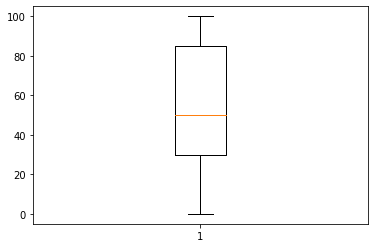

In [45]:
plt.boxplot(df.Contra.fillna(0))

{'whiskers': [<matplotlib.lines.Line2D at 0x26a99bfbe48>,
 'caps': [<matplotlib.lines.Line2D at 0x26a99bfbfc8>,
 'boxes': [<matplotlib.lines.Line2D at 0x26a99bfb5c8>],
 'medians': [<matplotlib.lines.Line2D at 0x26a99bfefc8>],
 'fliers': [<matplotlib.lines.Line2D at 0x26a99c089c8>],
 'means': []}

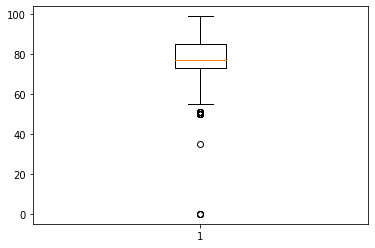

In [46]:
plt.boxplot(df.IPSI.fillna(0))

# RANGE FOR IPSI AND CONTRA FOR ASSOCIATION

In [47]:
##llmao i dont need a boxplt. do ipsi.describe
ipsi.describe()

count    1516.000000
mean       78.872032
std        10.162351
min        35.000000
25%        73.000000
50%        77.000000
75%        85.000000
max        99.000000
Name: IPSI, dtype: float64

In [48]:
df['Contra'].describe()

count    1520.000000
mean       56.790789
std        29.561904
min         0.000000
25%        30.000000
50%        50.000000
75%        85.000000
max       100.000000
Name: Contra, dtype: float64

In [49]:
df

,Random,Id,Indication,Diabetes,IHD,Hypertension,Arrhythmia,History,IPSI,Contra,label
0,0.989777,218242,A-F,no,no,yes,no,no,78.0,20,NoRisk
1,0.035766,159284,TIA,no,no,no,no,no,70.0,60,NoRisk
2,0.528960,106066,A-F,no,yes,yes,no,no,95.0,40,Risk
3,0.128157,229592,TIA,no,no,yes,no,no,90.0,85,Risk
4,0.676862,245829,CVA,no,no,no,no,no,70.0,20,NoRisk
...,...,...,...,...,...,...,...,...,...,...,...
1515,0.032989,93406,A-F,no,yes,no,no,no,76.0,60,NoRisk
1516,0.253504,121814,A-F,no,no,yes,yes,no,90.0,75,Risk
1517,0.620373,101754,TIA,no,no,yes,no,no,75.0,20,NoRisk
1518,0.639342,263836,A-F,no,yes,no,no,no,70.0,45,NoRisk


In [50]:
##as per data description
ipsi_rng = []
COUNT = 0
for item in ipsi:
    if 35<= item<73:
        x = str("Low")
        ipsi[COUNT] = x
    elif 74<= item<=84:
        x = str("Medium")
        ipsi[COUNT] = x
    elif item>=85:
        x = str("High")
        ipsi[COUNT] = x
    COUNT = COUNT + 1

D:\Anaconda\lib\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.
D:\Anaconda\lib\site-packages\pandas\core\indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
D:\Anaconda\lib\site-package

In [51]:
df['IPSI'] = ipsi

In [52]:
df

,Random,Id,Indication,Diabetes,IHD,Hypertension,Arrhythmia,History,IPSI,Contra,label
0,0.989777,218242,A-F,no,no,yes,no,no,Medium,20,NoRisk
1,0.035766,159284,TIA,no,no,no,no,no,Low,60,NoRisk
2,0.528960,106066,A-F,no,yes,yes,no,no,High,40,Risk
3,0.128157,229592,TIA,no,no,yes,no,no,High,85,Risk
4,0.676862,245829,CVA,no,no,no,no,no,Low,20,NoRisk
...,...,...,...,...,...,...,...,...,...,...,...
1515,0.032989,93406,A-F,no,yes,no,no,no,Medium,60,NoRisk
1516,0.253504,121814,A-F,no,no,yes,yes,no,High,75,Risk
1517,0.620373,101754,TIA,no,no,yes,no,no,Medium,20,NoRisk
1518,0.639342,263836,A-F,no,yes,no,no,no,Low,45,NoRisk


In [53]:
contra = df['Contra']
COUNT = 0
for item in contra:
    if 0<= item<=49:
        x = str("Low")
        contra[COUNT] = x
    elif 50<= item<80:
        x = str("Medium")
        contra[COUNT] = x
    elif item>=85:
        x = str("High")
        contra[COUNT] = x
    COUNT = COUNT + 1

D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if sys.path[0] == '':


In [54]:
df['Contra']= contra

In [55]:
df

,Random,Id,Indication,Diabetes,IHD,Hypertension,Arrhythmia,History,IPSI,Contra,label
0,0.989777,218242,A-F,no,no,yes,no,no,Medium,Low,NoRisk
1,0.035766,159284,TIA,no,no,no,no,no,Low,Medium,NoRisk
2,0.528960,106066,A-F,no,yes,yes,no,no,High,Low,Risk
3,0.128157,229592,TIA,no,no,yes,no,no,High,High,Risk
4,0.676862,245829,CVA,no,no,no,no,no,Low,Low,NoRisk
...,...,...,...,...,...,...,...,...,...,...,...
1515,0.032989,93406,A-F,no,yes,no,no,no,Medium,Medium,NoRisk
1516,0.253504,121814,A-F,no,no,yes,yes,no,High,Medium,Risk
1517,0.620373,101754,TIA,no,no,yes,no,no,Medium,Low,NoRisk
1518,0.639342,263836,A-F,no,yes,no,no,no,Low,Low,NoRisk


# Now for association. values to consider are basically all nominal values which have a NaN

In [ ]:
###84 combinations
##9!/(3!(9-3)!)
